# Project 1 : Sentiment Analysis
Julian Nelson
2/27/2024

## Problem
   Sentiment Analysis is an important tool in creating useable data surrounding user feelings on a product, this allows for better informed decision making on marketing strategies, product effectiveness and features, and reputation management.
 ### Goal
   My goal for this project is to gather and analyse the product reviews for games listed on the video game distribution website "Steam". These reviews contain multiple different types of information such as the review itself, the vote given by the user, the users playtime, games owned by reviewer, and even other users rating of the review.
   
   Within this project I hope to come to a conclusion on the overall user sentiment of the game, try to determine what factors may affect user sentiment.


In [1]:

import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
%matplotlib inline



To begin I am going to create two seperate functions using the steam documentation to gather reviews from the game "HellDivers 2"

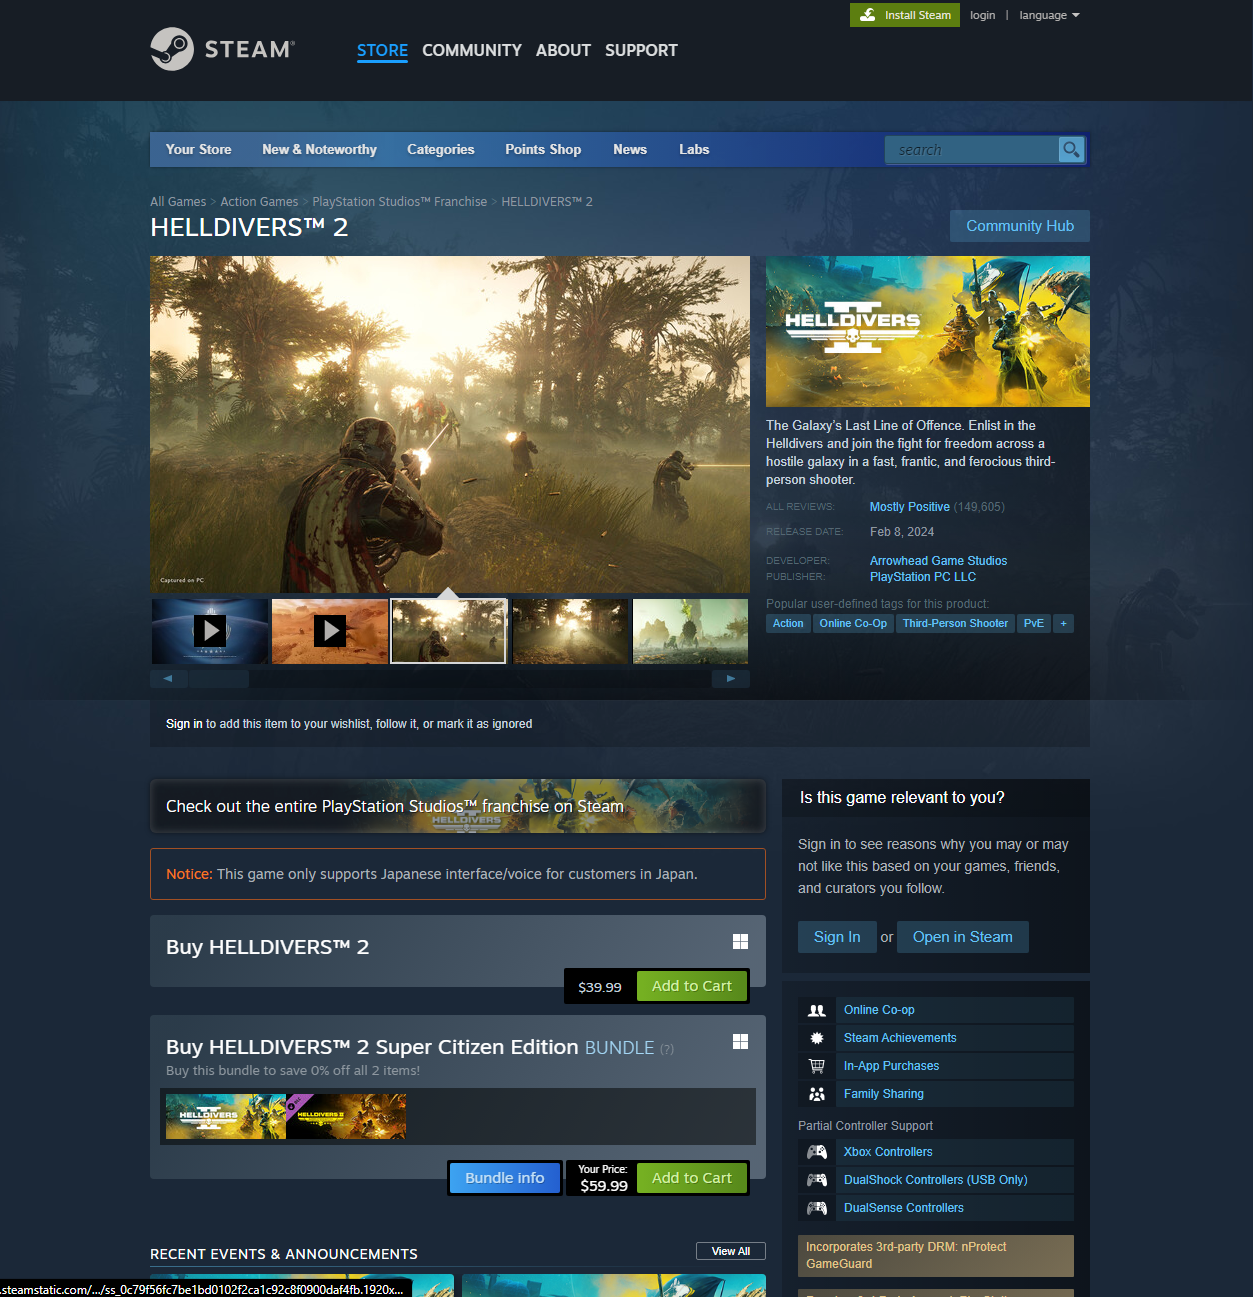

In [2]:
#func using steam documentation to gather json data from reviews
def getReviews(appID,  params = {'json': 1,
                              # 'num_per_page': 100
                                }):
    url = 'https://store.steampowered.com/appreviews/'
      
    request1 = requests.get(url = url + appID, params = params)
    request1 = request1.json() 
    return request1

def moreReviews(appID, x = 100):

    cursor = '*'
    reviews = []
    
    params = {
            'json' : 1,
            'filter' : 'all',
            'language' : 'english',
            'day_range' : 9223372036854775807,
            'review_type' : 'all',
            'purchase_type' : 'all'
            }

    while x > 0:
        params['cursor'] = cursor.encode()
        if(x<100):
            params['num_per_page'] = 100
        else:
            params['num_per_page'] = x
        x -= 100

        response = getReviews(appID, params)
        cursor = response['cursor']
        reviews += response['reviews']

        if len(response['reviews']) < 100: break

    return reviews

    

    
        

# utilizing the functions

In [3]:
#use func to create json
HDF = moreReviews('553850',1000)
#json named HDF
HDF[:1]

[{'recommendationid': '158456131',
  'author': {'steamid': '76561198001366665',
   'num_games_owned': 0,
   'num_reviews': 61,
   'playtime_forever': 1453,
   'playtime_last_two_weeks': 859,
   'playtime_at_review': 1436,
   'last_played': 1708101889},
  'language': 'english',
  'review': 'The only co-op game where you are scared of your teammates more than monsters',
  'timestamp_created': 1708099453,
  'timestamp_updated': 1708099453,
  'voted_up': True,
  'votes_up': 2740,
  'votes_funny': 1087,
  'weighted_vote_score': '0.97260439395904541',
  'comment_count': 0,
  'steam_purchase': True,
  'received_for_free': False,
  'written_during_early_access': False,
  'hidden_in_steam_china': True,
  'steam_china_location': ''}]

The json file output by the is not very readable so we turn it into a pandas data frame.
Nested values within the file cant be easily extracted so we have to normalize the data before we can use it.

In [4]:
#normalize to pandas df
#selecting which sections to include in the df



reviewsNormalize = []
for review in HDF:
    filteredReview = {
        'steamid' : review['author']['steamid'],
        'review': review['review'],
        'voted_up': review['voted_up'],
        'playtime_forever': review['author']['playtime_forever'],
        'playtime_at_review': review['author']['playtime_at_review'],
        'num_games_owned': review['author']['num_games_owned'],
        'num_reviews': review['author']['num_reviews']
    }
    reviewsNormalize.append(filteredReview)

# Create DataFrame
df = pd.DataFrame(reviewsNormalize)

# Selecting specific columns


df.shape


(1000, 7)

In [5]:
#json.normalize

df.head(10)

,steamid,review,voted_up,playtime_forever,playtime_at_review,num_games_owned,num_reviews
0,76561198001366665,The only co-op game where you are scared of yo...,True,1453,1436,0,61
1,76561198080591227,"Crazy to say that in February 2024, a successf...",True,847,327,172,21
2,76561198980623081,"Worked so hard to save Super-Earth, only to be...",True,4079,540,223,23
3,76561197962317612,"Thank you Jimmy525521,\nI will never forget th...",True,5568,364,545,23
4,76561198814613226,"During the tutorial, I threw a grenade into a ...",True,661,26,43,2
5,76561198193056827,"Instead of investing in a heater, fight automa...",True,1976,1415,0,2
6,76561198220970488,I'M DOING MY PART!!!,True,3517,2508,251,3
7,76561198053299733,I'm from Buenos Aires and I say kill 'em all!,True,3406,1476,500,18
8,76561198068540297,Got knocked out of bounds by some exploding mu...,True,9920,3710,0,7
9,76561198880429065,only good bug is a dead bug\n,True,3064,299,0,10


In [6]:
df.tail(10)

,steamid,review,voted_up,playtime_forever,playtime_at_review,num_games_owned,num_reviews
990,76561198042402914,Helldivers was great. Helldivers 2... it's too...,True,3578,1748,869,7
991,76561198038931832,How about a nice cup of Liber-tea?,True,965,5,0,94
992,76561198036241645,Why it always has to be some shit anticheat ru...,False,4995,18,541,19
993,76561198315789006,UPDATE 2/17/24: With all the updates the last ...,False,779,393,0,9
994,76561198319671746,nice if you like staring at the server full me...,False,1000,581,0,1
995,76561198165306740,It's just so much fun to play co-op,True,3560,130,222,34
996,76561198026473431,[b][i]HELLDIVERS™ 2[/i] is one of the best gam...,True,1990,1637,518,45
997,76561197998568963,REMEMBER THE SERVER ISSUES FOR WHEN ITS TIME T...,True,7190,2760,400,26
998,76561198037416124,Kill bug and spread freedom,True,2513,460,370,14
999,76561198047364886,honestly its a good game but i cant recommend ...,False,3522,3378,0,3


Our data frame is 1000 entries long and 7 consists of 7 categories


## EDA

<function matplotlib.pyplot.show(close=None, block=None)>

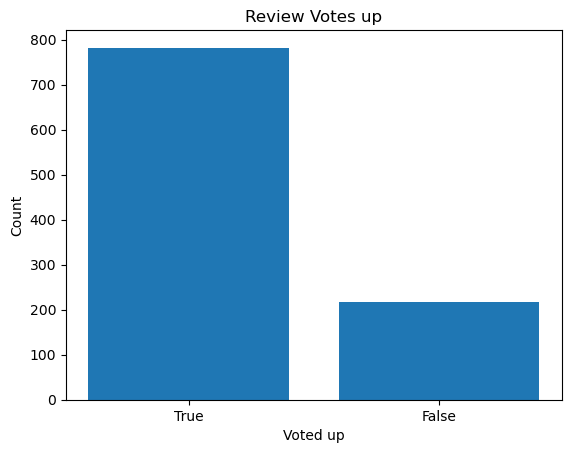

In [7]:
#plt.style.available
TFCounts = df['voted_up'].value_counts()

plt.bar(TFCounts.index.astype(str), TFCounts.values)
plt.style.use('seaborn-v0_8-bright')
plt.title('Review Votes up')
plt.xlabel('Voted up')
plt.ylabel('Count')

plt.show

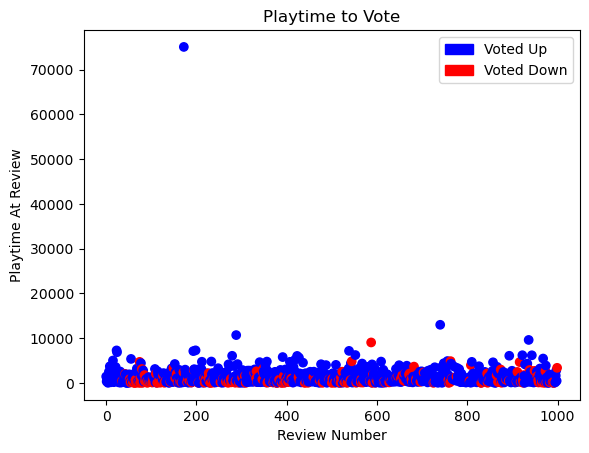

In [8]:



plt.scatter(range(len(df)), df['playtime_at_review'], c=df['voted_up'].map({True: 'blue', False: 'red'}))


# Adding colorbar
legend_elements = [mpatches.Patch(color='blue', label='Voted Up'),
                   mpatches.Patch(color='red', label='Voted Down')]
plt.legend(handles=legend_elements)

# Adding labels and title
plt.xlabel('Review Number')
plt.ylabel('Playtime At Review')
plt.title('Playtime to Vote')


# Show plot
plt.show()

We see that there is one Abnormal review in our gathered dataset, making it difficult to see the values in the graph. It is easier to clean the data by rmoving this abnormality as 70,000+ hours is infeasibly for a game that has been out for about a week.

Remove outlier

In [9]:
#find inedx


df = df.drop(df['playtime_at_review'].idxmax())


RePlot 

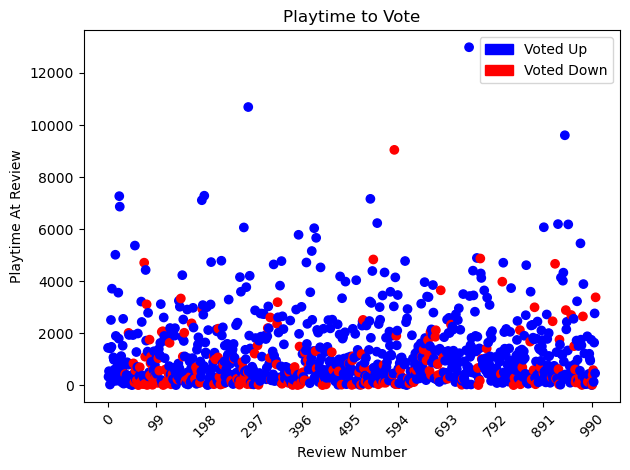

In [10]:
plt.scatter(range(len(df)), df['playtime_at_review'], c=df['voted_up'].map({True: 'blue', False: 'red'}))


legend_elements = [mpatches.Patch(color='blue', label='Voted Up'),
                   mpatches.Patch(color='red', label='Voted Down')]
plt.legend(handles=legend_elements)

# Adding labels and title
plt.xlabel('Review Number')
plt.ylabel('Playtime At Review')
plt.title('Playtime to Vote')
plt.xticks(range(0, len(df), len(df) // 10), rotation=45)
plt.margins(0.05)

# Show plot
plt.tight_layout()
plt.show()

Data looks easier to comprehend after removing the review with abnmormal playtime. 
It looks that reviews with more playtime at the time of review tend to skew towards giving the game an upvote.

# Begin Analysis



Example of what a review looks like

In [11]:
print(df['review'][10])

The game is certainly having some launch issues. 

It is safe to say however that if this game works for you, you will love it. It is fantastic, fluid movement and combat, realism where it's enjoyable and immersive, really fantastic stuff. 

My advice would be to take heed of the reviews, make the purchase, set a timer for two hours and refund the game if it doesn't end up working for you.


Create model using nltk (Natural Language ToolKit) library

In [12]:
                                        #toolbox
#.word_tokenize()
#.chunk.ne_chunk()
#.itterrows()
#.pos_tag()
#treebank.parsed_sents()[]
#nltk.help

In [13]:



sentimentAnalyzer = SentimentIntensityAnalyzer()

After creating Analyzer Object, words can be passed through it as tokens where each word is rated by the model

In [14]:
print(df['review'][10])
sentimentAnalyzer.polarity_scores(df['review'][10])

The game is certainly having some launch issues. 

It is safe to say however that if this game works for you, you will love it. It is fantastic, fluid movement and combat, realism where it's enjoyable and immersive, really fantastic stuff. 

My advice would be to take heed of the reviews, make the purchase, set a timer for two hours and refund the game if it doesn't end up working for you.


{'neg': 0.028, 'neu': 0.744, 'pos': 0.228, 'compound': 0.9531}

The sentiment analyzer sees this review as mostly positive but with some neutrality and a bit of negativity.

## Loop the sentiment analyzer over the reviews

In [15]:

scoreDict = {}
for x, row in df.iterrows():
    review = row['review']
    steamid = row['steamid']
    scoreDict[steamid] = sentimentAnalyzer.polarity_scores(review)

scoreDictFrame = pd.DataFrame(scoreDict).T


In [16]:
#only run once
scoreDictFrame =df.merge(scoreDictFrame, left_on='steamid', right_index=True, how='left')




We combined our sentiment values with our existing dataframe for better use-ability

In [17]:
scoreDictFrame.tail(5)

,steamid,review,voted_up,playtime_forever,playtime_at_review,num_games_owned,num_reviews,neg,neu,pos,compound
995,76561198165306740,It's just so much fun to play co-op,True,3560,130,222,34,0.000,0.501,0.499,0.7165
996,76561198026473431,[b][i]HELLDIVERS™ 2[/i] is one of the best gam...,True,1990,1637,518,45,0.074,0.715,0.212,0.9561
997,76561197998568963,REMEMBER THE SERVER ISSUES FOR WHEN ITS TIME T...,True,7190,2760,400,26,0.040,0.825,0.135,0.9733
998,76561198037416124,Kill bug and spread freedom,True,2513,460,370,14,0.395,0.252,0.353,-0.1280
999,76561198047364886,honestly its a good game but i cant recommend ...,False,3522,3378,0,3,0.124,0.712,0.164,0.1732


After passing The data through the VADER sentiment analyzer we see that the model is failing to understand the nuances of sentances and assigning negative values to seemingly positive reviews, however this is only for a few, as the compund value is the overall rating of the sentiment and is mostly spot on.

# Plotting Results


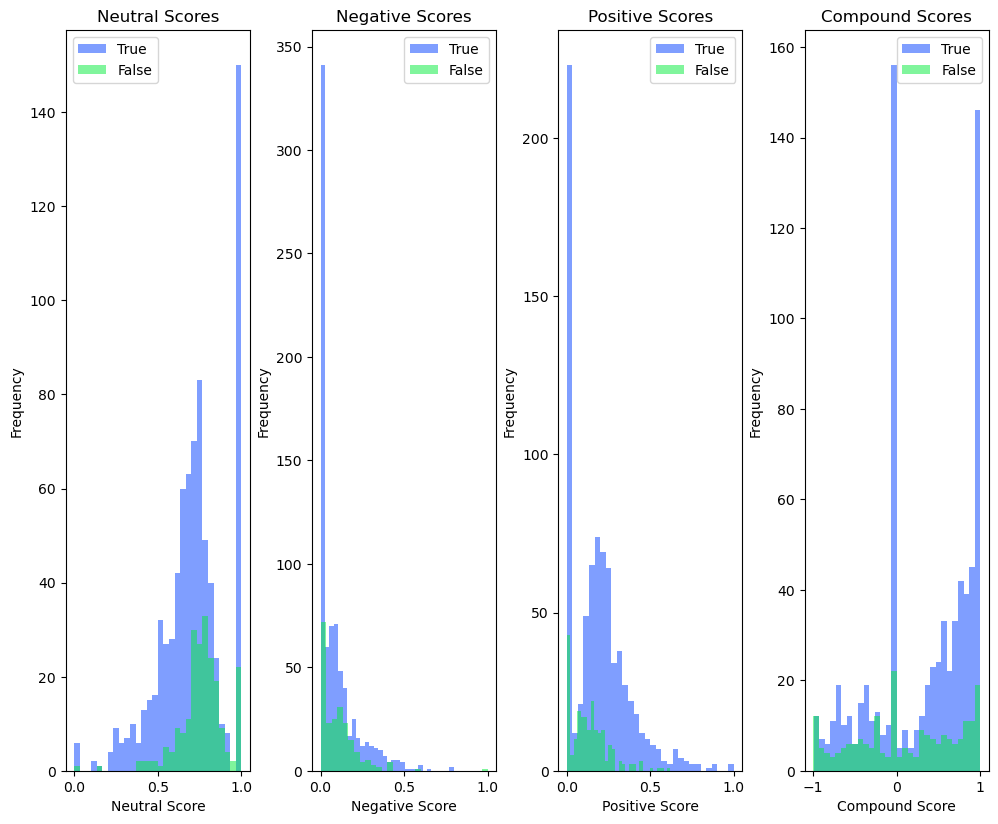

In [18]:



VotedUpdf = scoreDictFrame[scoreDictFrame['voted_up']]
VotedDwndf =scoreDictFrame[~scoreDictFrame['voted_up']]
fig,plots = plt.subplots(1,4, figsize = (10,8))
plt.tight_layout()
#neutral
plots[0].hist(VotedUpdf['neu'], bins=30, alpha=0.5, label='True')
plots[0].hist(VotedDwndf['neu'], bins=30, alpha=0.5, label='False')
plots[0].set_xlabel('Neutral Score')
plots[0].set_ylabel('Frequency')
plots[0].set_title('Neutral Scores')
plots[0].legend()
#neg
plots[1].hist(VotedUpdf['neg'], bins=30, alpha=0.5, label='True')
plots[1].hist(VotedDwndf['neg'], bins=30, alpha=0.5, label='False')
plots[1].set_xlabel('Negative Score')
plots[1].set_ylabel('Frequency')
plots[1].set_title('Negative Scores')
plots[1].legend()
#pos
plots[2].hist(VotedUpdf['pos'], bins=30, alpha=0.5, label='True')
plots[2].hist(VotedDwndf['pos'], bins=30, alpha=0.5, label='False')
plots[2].set_xlabel('Positive Score')
plots[2].set_ylabel('Frequency')
plots[2].set_title('Positive Scores')
plots[2].legend()
#compund
plots[3].hist(VotedUpdf['compound'], bins=30, alpha=0.5, label='True')
plots[3].hist(VotedDwndf['compound'], bins=30, alpha=0.5, label='False')
plots[3].set_xlabel('Compound Score')
plots[3].set_ylabel('Frequency')
plots[3].set_title('Compound Scores')
plots[3].legend()



From the plots it is shown that the neutral and compund scores are the highest average scores.
negative sentiment scores have the lowest value frequency for both up and downvotes.
And positive scores have the highest value for positive scores.


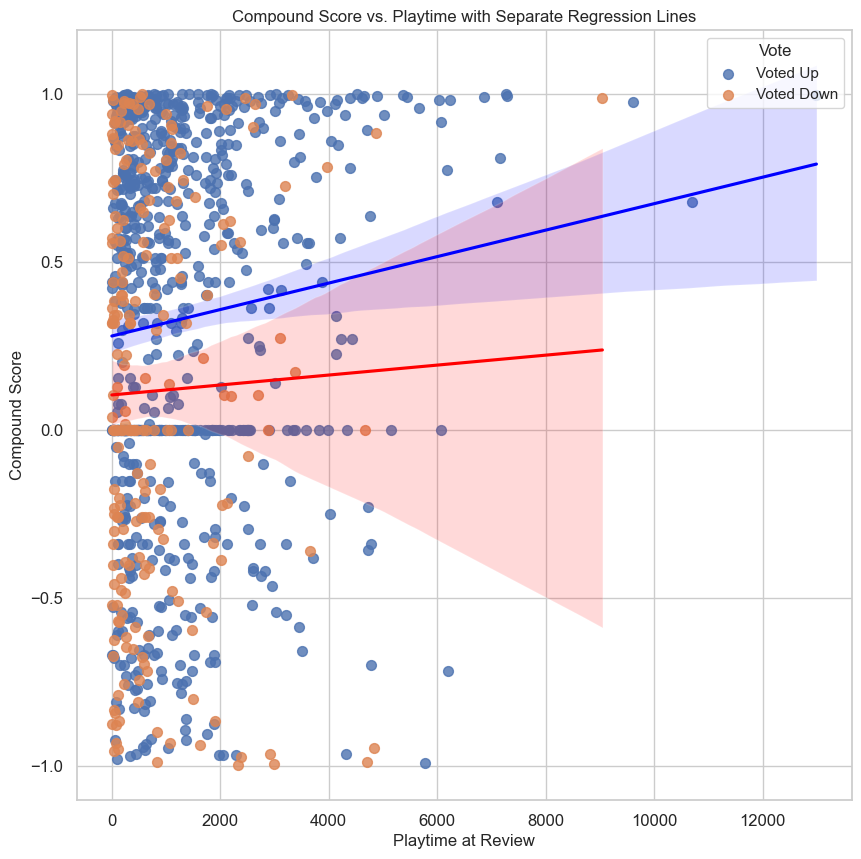

In [19]:


voted_up_true = scoreDictFrame[scoreDictFrame['voted_up']]
voted_up_false = scoreDictFrame[~scoreDictFrame['voted_up']]

sns.set(style='whitegrid')
plt.figure(figsize=(10, 10))

sns.regplot(x='playtime_at_review', y='compound', data=voted_up_true, scatter_kws={'s': 50}, line_kws={'color': 'blue'}, label='Voted Up')
sns.regplot(x='playtime_at_review', y='compound', data=voted_up_false, scatter_kws={'s': 50}, line_kws={'color': 'red'}, label='Voted Down')


plt.xlabel('Playtime at Review')
plt.ylabel('Compound Score')
plt.title('Compound Score vs. Playtime with Separate Regression Lines')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(title='Vote', loc='upper right')





When the compund score is plotted against playtime, we see that user sentiment tends to positively correlate with play time

<function matplotlib.pyplot.legend(*args, **kwargs)>

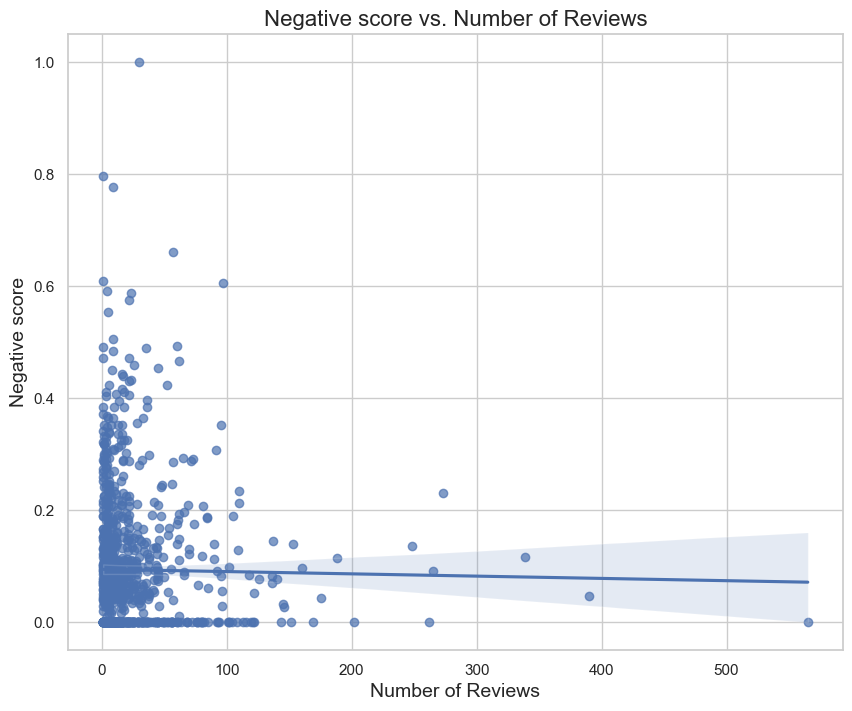

In [20]:
sns.set_style('whitegrid')

# Create scatter plot
plt.figure(figsize=(10, 8))
sns.regplot(x='num_reviews', y='neg', data=scoreDictFrame, scatter_kws ={'alpha' : 0.7} )

# Set labels and title
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Negative score', fontsize=14)
plt.title('Negative score vs. Number of Reviews', fontsize=16)
plt.legend


negative score trends downwards with number of reviews, leads towards the idea that newer accounts or "smurf" accounts tend to leave negative sentiment reviews

# Conclusion

After analyzing the playtime associated with the sentiment scores, we can conclude that despite the lack of nuance in the sentiment analysis model, upvoted reviews do have a higher general sentiment value than downvoted ones do.
    From the observations made we can also conclude that positive sentiment and upvoted reviews have the tendancy to coorelate with playtime, as well as negative sentiment scores lowering with review number.
    
 ### citation
 data was gathered from https://store.steampowered.com/app/553850/HELLDIVERS_2/
 steam data documentation page https://partner.steamgames.com/doc/store/getreviews